# Series and Columns

In [2]:
import pandas as pd
houses = pd.read_csv("../data/kc_house_data.csv")
titanic = pd.read_csv("../data/titanic.csv")
netflix = pd.read_csv("../data/netflix_titles.csv", sep="|", index_col=0)

## Selecting a single comun
We have two sintaxes we can use to select columns:
- **df.column_name**
- **df["column_name"]** - this is the best option to avoid misunderstandings by python

In [3]:
titanic.name

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [4]:
titanic["name"] # this is the best option to avoid misunderstandings by python

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

## Series
A Series is a one-dimensional labeled array in pandas, which can hold various data types (such as integers, floats, or strings). It can be thought of as a single column in a DataFrame, but it is independent and has its own index, which labels each data point.

### Key points:
- **Index**: Each element in a Series has a corresponding index that uniquely identifies it. This index can be either a default numerical index (0, 1, 2, ...) or a custom label, depending on how the Series is created.
    Example: titanic.name - it returns a Series where the index corresponds to the row numbers, and the data contains names from the Titanic dataset.

### Methods in a Series
You can apply various aggregation methods like **min()**, **max()**, **sum()**, and **count()** directly on a Series to analyze its data.
    
Example: houses.mean(numeric_only=True) calculates the mean value of a Series containing house prices, excluding non-numeric data.

### Common attributes and methods for Series:
- **series.shape**: Returns a tuple representing the dimensions of the Series. For a one-dimensional Series, it returns (number_of_rows,).
    Example: series.shape could return (100,), meaning the Series has 100 data points.
- **series.values**: Provides the underlying data of the Series as a NumPy array.
    Example: series.values will return the actual data without the index labels.
- **series.index**: Returns the index (labels) of the Series. This helps to understand what labels are associated with each data point.
    Example: series.index might return a range of integers or a custom set of labels, depending on how the Series was created.

In [5]:
titanic.name

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [6]:
houses.mean(numeric_only=True)

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

In [7]:
prices = houses.price
prices.sum(numeric_only=True)

np.float64(11672925008.0)

In [8]:
prices.shape

(21613,)

In [9]:
prices.values

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      shape=(21613,))

In [10]:
prices.index

RangeIndex(start=0, stop=21613, step=1)

## Series Methods

- `head()`
Returns the first few rows of a Series or DataFrame (default is 5). Useful for a quick preview of the data.

- `tail()`
Returns the last few rows of a Series or DataFrame (default is 5). Helps inspect the end of the data.

- `describe()`
Provides a summary of statistics for numerical columns, including count, mean, std, min, quartiles, and max.

- `unique()`
Returns an array of unique values in the Series. Useful for understanding the distinct elements.

- `nunique(dropna=True)`
Counts the number of unique values in a Series. By default, `dropna=True` excludes `NaN` values.

- `nlargest(n, columns)`
Returns the top `n` rows sorted by the specified column(s) in descending order.  
  - Single column: `table.nlargest(n, ["column"])`  
  - Multiple columns: `table.nlargest(n, ["column1", "column2"])`  

  When using `keep="all"`, all rows with the same value in the specified column(s) are included if they fall within the top `n` values. This ensures that ties are not excluded, even if the resulting number of rows exceeds `n`.

- `nsmallest(n, columns)`
Returns the top `n` rows sorted by the specified column(s) in ascending order.  
Similar syntax to `nlargest`.

- `value_counts()`
Counts the occurrences of each unique value in a Series.  
  - Use `ascending=False` to sort in descending order.


In [11]:
age = titanic.age
age.head()

0        29
1    0.9167
2         2
3        30
4        25
Name: age, dtype: object

In [12]:
age.tail

<bound method NDFrame.tail of 0           29
1       0.9167
2            2
3           30
4           25
         ...  
1304      14.5
1305         ?
1306      26.5
1307        27
1308        29
Name: age, Length: 1309, dtype: object>

In [13]:
age.describe()

count     1309
unique      99
top          ?
freq       263
Name: age, dtype: object

In [15]:
houses["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [16]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
netflix['rating'].nunique()

17

In [19]:
netflix['rating'].nunique(dropna=False)

18

In [21]:
houses.price.nlargest(10)

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
1315    5300000.0
1164    5110800.0
8092    4668000.0
2626    4500000.0
8638    4489000.0
Name: price, dtype: float64

In [22]:
houses.price.nsmallest()

1149     75000.0
15293    78000.0
465      80000.0
16198    81000.0
8274     82000.0
Name: price, dtype: float64

In [27]:
titanic.pclass.nlargest(7, keep="all")

600     3
601     3
602     3
603     3
604     3
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 709, dtype: int64

In [33]:
houses.nlargest(6, ["bedrooms"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291


In [34]:
houses.nlargest(6, ["bedrooms", "bathrooms"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866


In [36]:
houses[["price", "bedrooms", "bathrooms"]]

,price,bedrooms,bathrooms
0,221900.0,3,1.00
1,538000.0,3,2.25
2,180000.0,2,1.00
3,604000.0,4,3.00
4,510000.0,3,2.00
...,...,...,...
21608,360000.0,3,2.50
21609,400000.0,4,2.50
21610,402101.0,2,0.75
21611,400000.0,3,2.50


In [39]:
houses["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [40]:
houses["bedrooms"].value_counts(ascending=True)

bedrooms
33       1
11       1
10       3
9        6
0       13
8       13
7       38
1      199
6      272
5     1601
2     2760
4     6882
3     9824
Name: count, dtype: int64

## Selecting Multiple Columns

### Syntax
- `table[["column1", "column2"]]`  
  Returns a DataFrame containing the selected columns.
- `table["column1"]`  
  Returns a Series with the values of the specified column.
- `table[["column1"]]`  
  Returns a DataFrame with only one column.

In [41]:
houses[["bedrooms", "bathrooms"]]

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00
...,...,...
21608,3,2.50
21609,4,2.50
21610,2,0.75
21611,3,2.50


In [42]:
houses[["bedrooms", "bathrooms"]].value_counts()

bedrooms  bathrooms
4         2.50         2502
3         2.50         2357
          1.75         1870
          1.00         1780
2         1.00         1558
                       ... 
10        2.00            1
          3.00            1
          5.25            1
11        3.00            1
33        1.75            1
Name: count, Length: 144, dtype: int64

## Plot
`plot(x=None, y=None, kind='line')`

Generates a plot of the data.  

- `x`: Specifies the column to use for the x-axis. If not provided, the index is used.  
- `y`: Specifies the column to use for the y-axis.  
- `kind`: Defines the type of plot. Common options include:
  - `'line'` (default): Line plot.  
  - `'bar'`: Vertical bar plot.  
  - `'barh'`: Horizontal bar plot.  
  - `'hist'`: Histogram.  
  - `'scatter'`: Scatter plot.  

If working with a **Series**, you can simply use `.plot()` without specifying `x` or `y`.

Example:
```python
table.plot(x="column1", y="column2", kind="scatter")  # For DataFrame
series.plot()  # For Series

<Axes: >

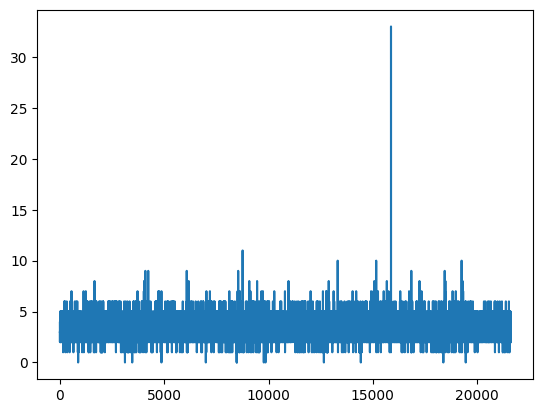

In [45]:
houses.bedrooms.plot()

In [56]:
hs = houses.bedrooms.value_counts()
hs

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

<Axes: xlabel='bedrooms'>

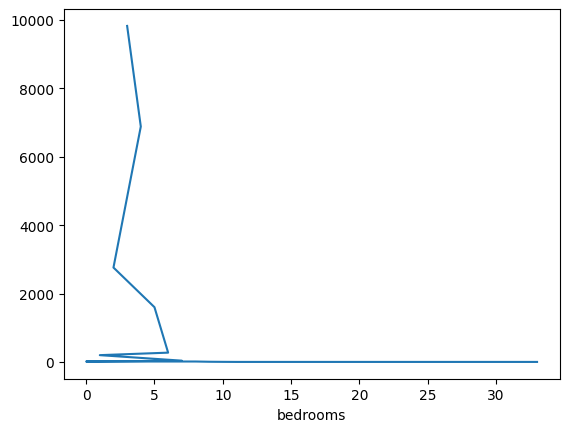

In [57]:
hs.plot()

<Axes: xlabel='bedrooms'>

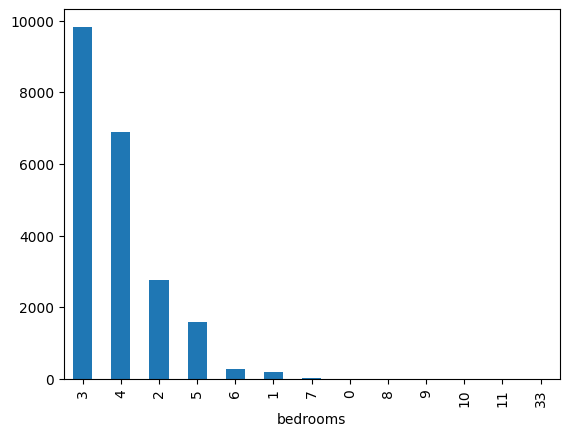

In [53]:
hs.plot(kind='bar')

<Axes: ylabel='count'>

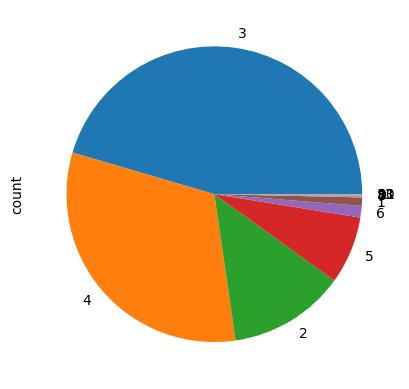

In [54]:
hs.plot(kind='pie')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

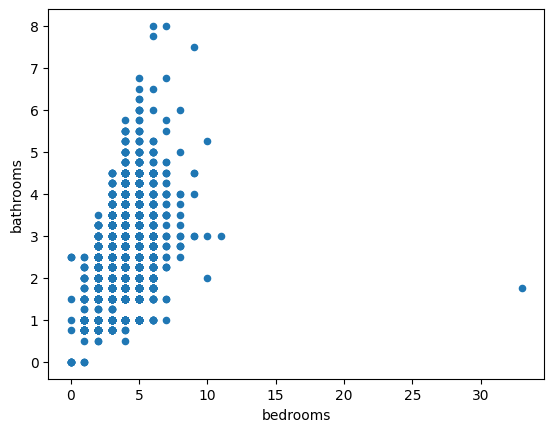

In [58]:
houses.plot(x='bedrooms', y='bathrooms', kind='scatter')